# Simple Time Series Decomposition

In this notebook we will see how time series decomposition work. This is not the original breakdown of the `statsmodels` seasonal decomposition instead this post will help to understand each and every component of the decomposition process.

## Load Libraries

In [8]:
import pandas as pd
import numpy as np
import statsmodels as stm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv("TS/data.csv", index_col='Month')

In [3]:
df.sort_index(inplace=True)

In [4]:
df

Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121
...             ...
1960-08         606
1960-09         508
1960-10         461
1960-11         390
1960-12         432

[144 rows x 1 columns]

<Figure size 504x504 with 0 Axes>

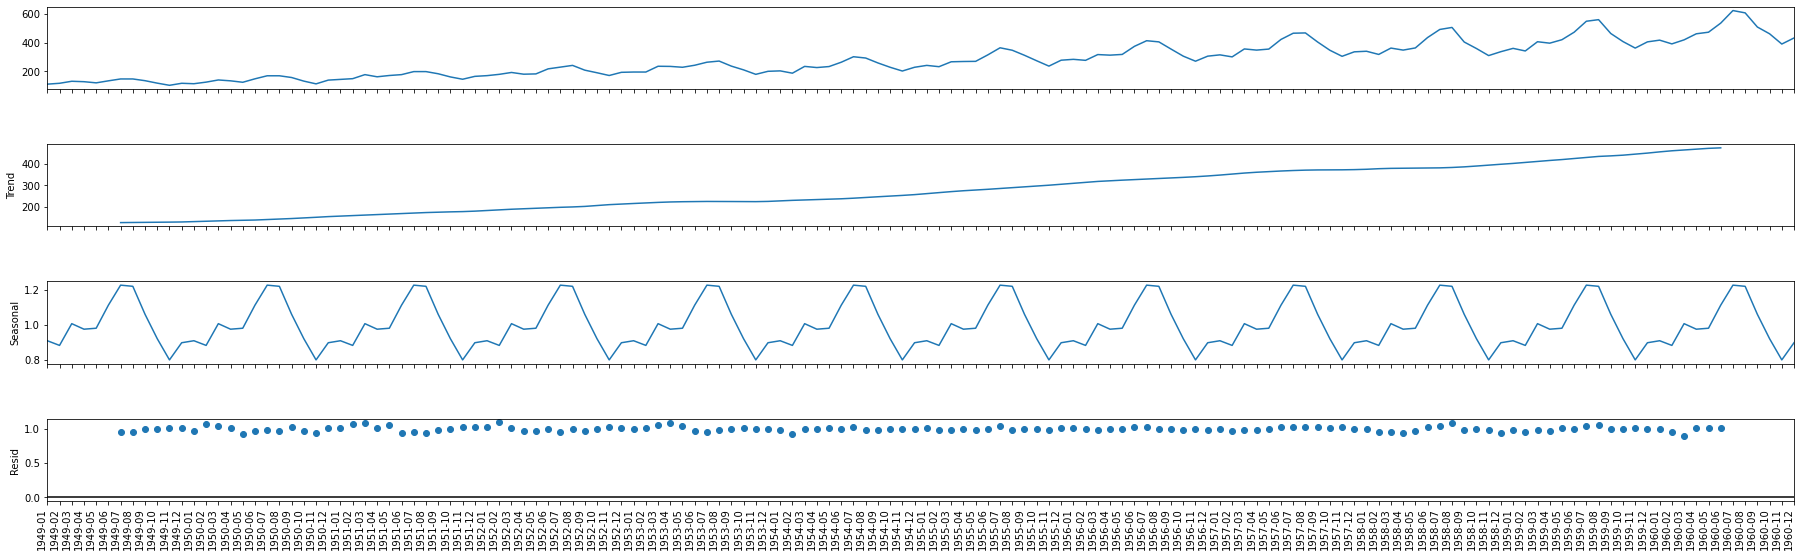

In [5]:
plt.figure(figsize=(7,7))

series = df
result = seasonal_decompose(series, model='multiplicative', period=12)

fig = result.plot()

fig.set_size_inches((30, 9))
fig.autofmt_xdate(rotation=90)


plt.show()

## Load dataset

In [7]:
df = pd.read_csv("TS/data.csv", index_col= 'Month')

In [7]:
df.head()

Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121

In [8]:
def standardize(df, ts:str, data:str):
    df.sort_index(inplace=True)
    df.reset_index(inplace=True)
    df.rename(columns={ts:"ts", data:"data"}, inplace=True)
    df.reset_index(inplace=True)
    return df
    

In [9]:
df_r = standardize(df, ts='Month', data = 'Passengers')

In [10]:
df_r

index       ts  data
0        0  1949-01   112
1        1  1949-02   118
2        2  1949-03   132
3        3  1949-04   129
4        4  1949-05   121
..     ...      ...   ...
139    139  1960-08   606
140    140  1960-09   508
141    141  1960-10   461
142    142  1960-11   390
143    143  1960-12   432

[144 rows x 3 columns]

In [11]:
df_r.columns

Index(['index', 'ts', 'data'], dtype='object')

<AxesSubplot:>

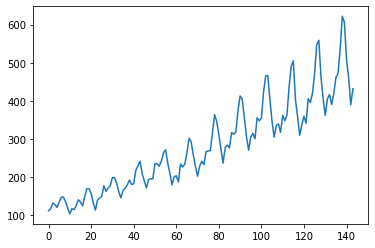

In [12]:
df_r['data'].plot()

In [17]:
X = np.array(df_r['index'])
y = np.array(df_r['data'])

order = 2
coef = np.polyfit(X,
                  y.ravel(),
                  order)
coef

array([7.00819832e-03, 1.65501155e+00, 1.14028041e+02])

In [18]:
poly_1d = np.poly1d(coef)
poly_1d

poly1d([7.00819832e-03, 1.65501155e+00, 1.14028041e+02])

In [19]:
df_r['approx_trend'] = poly_1d(X)

In [20]:
df_r

index       ts  data  approx_trend
0        0  1949-01   112    114.028041
1        1  1949-02   118    115.690061
2        2  1949-03   132    117.366097
3        3  1949-04   129    119.056149
4        4  1949-05   121    120.760218
..     ...      ...   ...           ...
139    139  1960-08   606    479.480046
140    140  1960-09   508    483.090345
141    141  1960-10   461    486.714660
142    142  1960-11   390    490.352992
143    143  1960-12   432    494.005340

[144 rows x 4 columns]

In [21]:
orig = approx_trend = pd.Series(data = df_r['data'].values,
                  index = df_r['ts'])
approx_trend = pd.Series(data = df_r['approx_trend'].values,
                  index = df_r['ts'])

<AxesSubplot:xlabel='ts'>

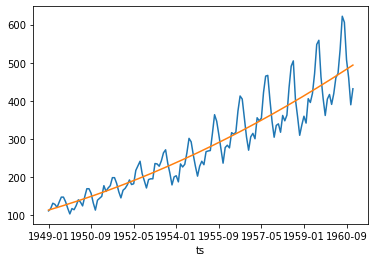

In [22]:
orig.plot()
approx_trend.plot()

In [25]:
df_r

index       ts  data  approx_trend
0        0  1949-01   112    114.028041
1        1  1949-02   118    115.690061
2        2  1949-03   132    117.366097
3        3  1949-04   129    119.056149
4        4  1949-05   121    120.760218
..     ...      ...   ...           ...
139    139  1960-08   606    479.480046
140    140  1960-09   508    483.090345
141    141  1960-10   461    486.714660
142    142  1960-11   390    490.352992
143    143  1960-12   432    494.005340

[144 rows x 4 columns]

In [26]:
df_r['detrended'] = df_r['data'] - df_r['approx_trend']

In [27]:
detrended = pd.Series(data = df_r['detrended'].values,
                  index = df_r['ts'])

<AxesSubplot:>

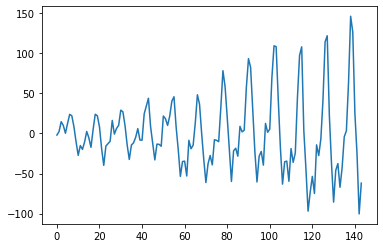

In [28]:
df_r["detrended"].plot()

In [31]:
detrended

ts
1949-01     -2.028041
1949-02      2.309939
1949-03     14.633903
1949-04      9.943851
1949-05      0.239782
              ...    
1960-08    126.519954
1960-09     24.909655
1960-10    -25.714660
1960-11   -100.352992
1960-12    -62.005340
Length: 144, dtype: float64

In [32]:
df_r['date'] = pd.to_datetime(df_r.ts)

In [33]:
df_r

index       ts  data  approx_trend   detrended       date
0        0  1949-01   112    114.028041   -2.028041 1949-01-01
1        1  1949-02   118    115.690061    2.309939 1949-02-01
2        2  1949-03   132    117.366097   14.633903 1949-03-01
3        3  1949-04   129    119.056149    9.943851 1949-04-01
4        4  1949-05   121    120.760218    0.239782 1949-05-01
..     ...      ...   ...           ...         ...        ...
139    139  1960-08   606    479.480046  126.519954 1960-08-01
140    140  1960-09   508    483.090345   24.909655 1960-09-01
141    141  1960-10   461    486.714660  -25.714660 1960-10-01
142    142  1960-11   390    490.352992 -100.352992 1960-11-01
143    143  1960-12   432    494.005340  -62.005340 1960-12-01

[144 rows x 6 columns]

In [34]:
df_r['month'] = df_r['date'].dt.month

In [35]:
df_r

index       ts  data  approx_trend   detrended       date  month
0        0  1949-01   112    114.028041   -2.028041 1949-01-01      1
1        1  1949-02   118    115.690061    2.309939 1949-02-01      2
2        2  1949-03   132    117.366097   14.633903 1949-03-01      3
3        3  1949-04   129    119.056149    9.943851 1949-04-01      4
4        4  1949-05   121    120.760218    0.239782 1949-05-01      5
..     ...      ...   ...           ...         ...        ...    ...
139    139  1960-08   606    479.480046  126.519954 1960-08-01      8
140    140  1960-09   508    483.090345   24.909655 1960-09-01      9
141    141  1960-10   461    486.714660  -25.714660 1960-10-01     10
142    142  1960-11   390    490.352992 -100.352992 1960-11-01     11
143    143  1960-12   432    494.005340  -62.005340 1960-12-01     12

[144 rows x 7 columns]

In [36]:
detrended = pd.Series(data = df_r['detrended'].values,
                  index = df_r['date'])

In [37]:
detrended

date
1949-01-01     -2.028041
1949-02-01      2.309939
1949-03-01     14.633903
1949-04-01      9.943851
1949-05-01      0.239782
                 ...    
1960-08-01    126.519954
1960-09-01     24.909655
1960-10-01    -25.714660
1960-11-01   -100.352992
1960-12-01    -62.005340
Length: 144, dtype: float64

In [38]:
seasonal = detrended.groupby(by = detrended.index.month).mean()

In [39]:
seasonal

date
1    -24.062583
2    -33.399685
3     -0.834137
4     -6.532605
5     -4.411756
6     32.778410
7     69.787893
8     66.866692
9     15.514809
10   -23.017758
11   -59.481007
12   -33.208273
dtype: float64

In [40]:
seasonal.loc[1]

-24.06258325268634

In [41]:
for i in seasonal.index:
    df_r.loc[df_r.month == i, "seasonality"] = seasonal.loc[i]

In [42]:
df_r

index       ts  data  approx_trend   detrended       date  month  \
0        0  1949-01   112    114.028041   -2.028041 1949-01-01      1   
1        1  1949-02   118    115.690061    2.309939 1949-02-01      2   
2        2  1949-03   132    117.366097   14.633903 1949-03-01      3   
3        3  1949-04   129    119.056149    9.943851 1949-04-01      4   
4        4  1949-05   121    120.760218    0.239782 1949-05-01      5   
..     ...      ...   ...           ...         ...        ...    ...   
139    139  1960-08   606    479.480046  126.519954 1960-08-01      8   
140    140  1960-09   508    483.090345   24.909655 1960-09-01      9   
141    141  1960-10   461    486.714660  -25.714660 1960-10-01     10   
142    142  1960-11   390    490.352992 -100.352992 1960-11-01     11   
143    143  1960-12   432    494.005340  -62.005340 1960-12-01     12   

     seasonality  
0     -24.062583  
1     -33.399685  
2      -0.834137  
3      -6.532605  
4      -4.411756  
..           ...  
139    66.866692  
140    15.514809  
141   -23.017758  
142   -59.481007  
143   -33.208273  

[144 rows x 8 columns]

<AxesSubplot:>

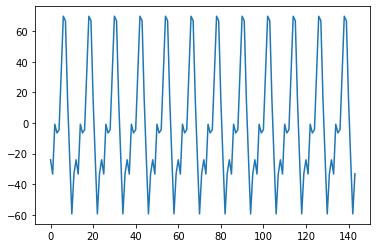

In [43]:
df_r['seasonality'].plot()

In [45]:
df_r['deseasonal'] = df_r['data'] - df_r['seasonality']

In [46]:
df_r

index       ts  data  approx_trend   detrended       date  month  \
0        0  1949-01   112    114.028041   -2.028041 1949-01-01      1   
1        1  1949-02   118    115.690061    2.309939 1949-02-01      2   
2        2  1949-03   132    117.366097   14.633903 1949-03-01      3   
3        3  1949-04   129    119.056149    9.943851 1949-04-01      4   
4        4  1949-05   121    120.760218    0.239782 1949-05-01      5   
..     ...      ...   ...           ...         ...        ...    ...   
139    139  1960-08   606    479.480046  126.519954 1960-08-01      8   
140    140  1960-09   508    483.090345   24.909655 1960-09-01      9   
141    141  1960-10   461    486.714660  -25.714660 1960-10-01     10   
142    142  1960-11   390    490.352992 -100.352992 1960-11-01     11   
143    143  1960-12   432    494.005340  -62.005340 1960-12-01     12   

     seasonality  deseasonal  
0     -24.062583  136.062583  
1     -33.399685  151.399685  
2      -0.834137  132.834137  
3      -6.532605  135.532605  
4      -4.411756  125.411756  
..           ...         ...  
139    66.866692  539.133308  
140    15.514809  492.485191  
141   -23.017758  484.017758  
142   -59.481007  449.481007  
143   -33.208273  465.208273  

[144 rows x 9 columns]

<AxesSubplot:>

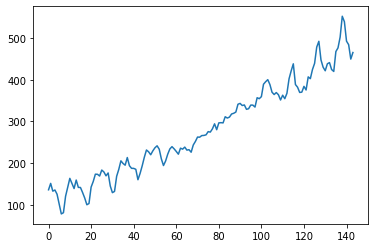

In [47]:
df_r['deseasonal'].plot()

In [49]:
X = np.array(df_r['index'])
y = np.array(df_r['deseasonal'])

order = 2
coef = np.polyfit(X,
                  y.ravel(),
                  order)
coef

array([7.13671707e-03, 1.63975702e+00, 1.14239650e+02])

In [50]:
poly_1d = np.poly1d(coef)
poly_1d

poly1d([7.13671707e-03, 1.63975702e+00, 1.14239650e+02])

In [51]:
df_r['trend'] = poly_1d(X)

In [52]:
df_r

index       ts  data  approx_trend   detrended       date  month  \
0        0  1949-01   112    114.028041   -2.028041 1949-01-01      1   
1        1  1949-02   118    115.690061    2.309939 1949-02-01      2   
2        2  1949-03   132    117.366097   14.633903 1949-03-01      3   
3        3  1949-04   129    119.056149    9.943851 1949-04-01      4   
4        4  1949-05   121    120.760218    0.239782 1949-05-01      5   
..     ...      ...   ...           ...         ...        ...    ...   
139    139  1960-08   606    479.480046  126.519954 1960-08-01      8   
140    140  1960-09   508    483.090345   24.909655 1960-09-01      9   
141    141  1960-10   461    486.714660  -25.714660 1960-10-01     10   
142    142  1960-11   390    490.352992 -100.352992 1960-11-01     11   
143    143  1960-12   432    494.005340  -62.005340 1960-12-01     12   

     seasonality  deseasonal       trend  
0     -24.062583  136.062583  114.239650  
1     -33.399685  151.399685  115.886544  
2      -0.834137  132.834137  117.547711  
3      -6.532605  135.532605  119.223151  
4      -4.411756  125.411756  120.912865  
..           ...         ...         ...  
139    66.866692  539.133308  480.054386  
140    15.514809  492.485191  483.685287  
141   -23.017758  484.017758  487.330462  
142   -59.481007  449.481007  490.989910  
143   -33.208273  465.208273  494.663631  

[144 rows x 10 columns]

<AxesSubplot:>

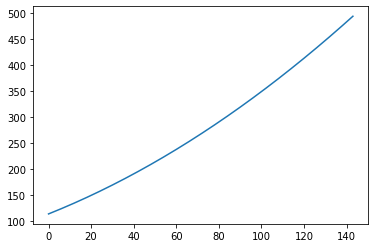

In [53]:
df_r['trend'].plot()

In [58]:
df_r['residual'] = df_r["data"] - df_r['trend'] - df_r['seasonality']

<AxesSubplot:>

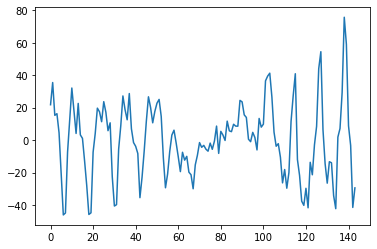

In [59]:
df_r['residual'].plot()